In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk
import matplotlib.pyplot as plt
import pathlib
from sklearn import model_selection

In [2]:
print(f"Tensorflow version              : {tf.__version__}")
print(f"Sklearn version                 : {sk.__version__}")
print(f"Pandas version                  : {pd.__version__}")
print(f"Numpy version                   : {np.__version__}")

Tensorflow version              : 2.8.0
Sklearn version                 : 1.0.2
Pandas version                  : 1.4.1
Numpy version                   : 1.22.2


In [3]:
csvFile_path = "../Dataset/pedigree dataset.csv"
collumnName = [
    "base_color_male",
    "with_white_male",
    "base_color_female",
    "with_white_female",
    "color_prediction"
]

categorical_feature_keys = [
    "base_color_male",
    "base_color_female"
]

numeric_feature_keys = [
    "with_white_male",
    "with_white_female"
]

label_key = "color_prediction"

In [4]:
dataset = pd.read_csv(csvFile_path, names=collumnName, delimiter=",", header=0)

dataset.head(10)

,base_color_male,with_white_male,base_color_female,with_white_female,color_prediction
0,black,0,black,0,black
1,black,1,black,0,black
2,black,0,black,1,black
3,black,1,black,1,black
4,grey,0,grey,0,grey
5,grey,1,grey,0,grey
6,grey,0,grey,1,grey
7,grey,1,grey,1,grey
8,orange,0,orange,0,orange
9,orange,1,orange,0,orange


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   base_color_male    128 non-null    object
 1   with_white_male    128 non-null    int64 
 2   base_color_female  128 non-null    object
 3   with_white_female  128 non-null    int64 
 4   color_prediction   124 non-null    object
dtypes: int64(2), object(3)
memory usage: 5.1+ KB


In [6]:
def feature_per_value(data, feature):
    values_in_feature = data[feature].unique()
    
    values_convertDict = {}
    for index, value in enumerate(values_in_feature):
        values_convertDict[value] = index
    
    return values_convertDict

In [7]:
maleColor = feature_per_value(dataset, categorical_feature_keys[0])
femaleColor = feature_per_value(dataset, categorical_feature_keys[1])
labelColor = feature_per_value(dataset, label_key)

print(f"Base Male Color convert value: {maleColor}",
      f"Base Female Color convert value: {femaleColor}",
      f"Prediction Color convert value: {labelColor}",
      sep="\n")

Base Male Color convert value: {'black': 0, 'grey': 1, 'orange': 2, 'silver': 3}
Base Female Color convert value: {'black': 0, 'grey': 1, 'orange': 2, 'silver': 3, 'black tortie': 4, 'grey tortie': 5}
Prediction Color convert value: {'black': 0, 'grey': 1, 'orange': 2, 'silver': 3, nan: 4}


In [8]:
dataset = sk.utils.shuffle(dataset)

dataset.head(10)

,base_color_male,with_white_male,base_color_female,with_white_female,color_prediction
19,grey,1,black,1,black
63,silver,1,orange,1,orange
29,orange,1,black,0,black
54,silver,0,grey,1,grey
79,grey,1,black tortie,1,orange
12,silver,0,silver,0,silver
39,silver,1,black,1,black
113,orange,0,grey tortie,0,orange
53,silver,1,grey,0,grey
67,black,1,black tortie,0,orange


In [9]:
dataset[categorical_feature_keys[0]] = dataset[categorical_feature_keys[0]].map(maleColor)
dataset[categorical_feature_keys[1]] = dataset[categorical_feature_keys[1]].map(femaleColor)

dataset.head(10)

,base_color_male,with_white_male,base_color_female,with_white_female,color_prediction
19,1,1,0,1,black
63,3,1,2,1,orange
29,2,1,0,0,black
54,3,0,1,1,grey
79,1,1,4,1,orange
12,3,0,3,0,silver
39,3,1,0,1,black
113,2,0,5,0,orange
53,3,1,1,0,grey
67,0,1,4,0,orange


In [10]:
dataFeature_x = dataset.drop(label_key, axis=1)
datalabel_y = dataset[label_key]

print(dataFeature_x.head(10), datalabel_y.head(10), sep="\n\n")

     base_color_male  with_white_male  base_color_female  with_white_female
19                 1                1                  0                  1
63                 3                1                  2                  1
29                 2                1                  0                  0
54                 3                0                  1                  1
79                 1                1                  4                  1
12                 3                0                  3                  0
39                 3                1                  0                  1
113                2                0                  5                  0
53                 3                1                  1                  0
67                 0                1                  4                  0

19      black
63     orange
29      black
54       grey
79     orange
12     silver
39      black
113    orange
53       grey
67     orange
Name: color_prediction,

In [11]:
encoder = sk.preprocessing.LabelEncoder()
encoder.fit(datalabel_y)
datalabel_y = encoder.transform(datalabel_y)
datalabel_y = tf.keras.utils.to_categorical(datalabel_y)

In [69]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(dataFeature_x, datalabel_y, test_size=0.2)

In [81]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(
        input_dim=6,
        output_dim=64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics = ["accuracy"]
)

In [75]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(5, activation="softmax"))

model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [82]:
history = model.fit(x_train, y_train,
          epochs = 100, batch_size = 2)

Epoch 1/100
51/51 [==============================] - 4s 21ms/step - loss: 1.5990 - accuracy: 0.3725
Epoch 2/100
51/51 [==============================] - 1s 17ms/step - loss: 1.5806 - accuracy: 0.3824
Epoch 3/100
51/51 [==============================] - 1s 16ms/step - loss: 1.5616 - accuracy: 0.3824
Epoch 4/100
51/51 [==============================] - 1s 15ms/step - loss: 1.5385 - accuracy: 0.3824
Epoch 5/100
51/51 [==============================] - 1s 16ms/step - loss: 1.5107 - accuracy: 0.3824
Epoch 6/100
51/51 [==============================] - 1s 17ms/step - loss: 1.4826 - accuracy: 0.3824
Epoch 7/100
51/51 [==============================] - 1s 16ms/step - loss: 1.4539 - accuracy: 0.3824
Epoch 8/100
51/51 [==============================] - 1s 15ms/step - loss: 1.4267 - accuracy: 0.3824
Epoch 9/100
51/51 [==============================] - 1s 15ms/step - loss: 1.4008 - accuracy: 0.3824
Epoch 10/100
51/51 [==============================] - 1s 16ms/step - loss: 1.3794 - accuracy: 0.3824

In [58]:
def result_visualization(model_result):
    acc = model_result.history["accuracy"]
    lss = model_result.history["loss"]
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'b', label="Training Accuracy")
    plt.plot(epochs, lss, 'r', label="Training Loss")
    plt.title("Accuracy Graph")
    plt.legend(loc=0)
    plt.figure()
    plt.show()

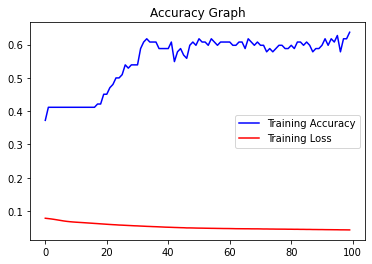

<Figure size 432x288 with 0 Axes>

In [62]:
result_visualization(history) # 100 epochs try

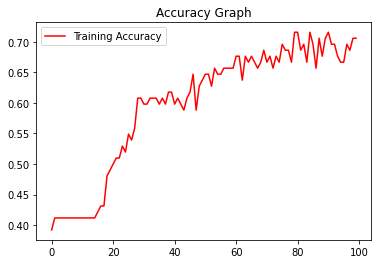

<Figure size 432x288 with 0 Axes>

In [38]:
result_visualization(history) # 100 epochs using lstm (costum learning rate)

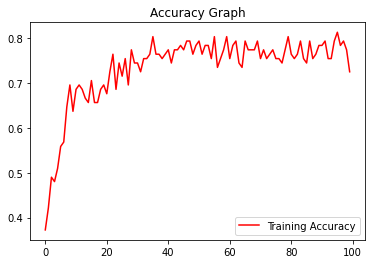

<Figure size 432x288 with 0 Axes>

In [35]:
result_visualization(history) # 100 epochs using lstm

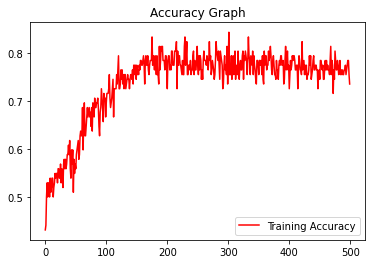

<Figure size 432x288 with 0 Axes>

In [17]:
result_visualization(history) # 500 epochs

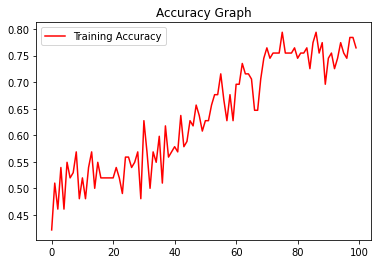

<Figure size 432x288 with 0 Axes>

In [69]:
result_visualization(history) # 100 epochs

In [18]:
model.save("pedigree_male_model_1")

INFO:tensorflow:Assets written to: pedigree_male_model_1\assets


In [19]:
def save_tflite(mode):
    if mode.lower() == "storage":
        return tf.lite.Optimize.OPTIMIZE_FOR_SIZE
    elif mode.lower() == "speed":
        return tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
    else:
        return tf.lite.Optimize.DEFAULT

In [20]:
export_path = "pedigree_male_model_tflite_1"
tf.saved_model.save(model, export_path)

INFO:tensorflow:Assets written to: pedigree_male_model_tflite_1\assets


In [21]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

converter.optimizations = [save_tflite("speed")]

tflite_model = converter.convert()

In [24]:
tflite_modelFile = pathlib.Path("pedigree_male_model_tflite_1.tflite")
tflite_modelFile.write_bytes(tflite_model)

10496

In [25]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()